# TS5:Estimación espectral: Ancho de banda de señales reales

### Francisco Mato y Angel Joseph Vargas Martinez
## introduccion
la densidad espectral de potencia (PSD) consiste en hacer la DTFT a la funcion de autocorrelacion de modo que podamos conocer la energia y frecuencias caracteristicas de una funcion. cuando lo traemos al mundo real surgen dos problemas importantes; el primero es que no tenemos una cantidad infinita de muestras de la señal, y segundo tampoco tenemos una señal la cual podemos definir como "verdara" y poder sacar informacion de ella.por ese motivo  existen distintos estimadores de PSD, pero ellos tambien traen problemas generalmente relacionados con que al no tener infinitas muestras la señal se convierte en un proceso aleatorio lo cual traera una ezperanza y varianza.

la primera forma de estimacion espectral fue el periodograma, el cual consistia en calcular la PSD de forma discreta, esto traia el problema de que usar la DFT implicaba hacer la autocorrelacion no solo de la señal  si no que tambien de la ventana implicita, generando que la estimacion este sesgada por la ventana de barlet(autocorrelacion de la ventana rectangular) y por lo tanto es estimador este sesgado aunque es asintoticamente insesgada, pero la varianza no es asintoticamente 1 cuando las muestras son infinita, por lo que no es un estimador consistente.

uno de los metodos utiliazados es el periodograma modificado que sale de hacer la DFT de la señal ventaneada para reducir el efecto del ventaneado rectangular, esto hace si bien es sesgada por la ventana, el sesgo se reduce en comparacion a la de la ventana de barlet,pero en asintoticamente insesgada (en el infinito la ezperanza es 0).la varianza del periodograma no tiende a 1 cuando hay infinitas muestras. 

otro metodo de estimacion de PSD utilizado en el trabajo es el metodo de welch, el cual combina el periodograma modificado con el metodo de barlett. el metodo de barlett el cual consiste en tomar la señal en k bloques no supepuestos de la largo l y calcular la PSD de cada uno y luego hacer un promedio de todos (el metodo asume que es un proceso engodico), esto logra que podamos controlar la varianza del estimador pero a cambio perdemos resolucion espectras, es decir, PERDERMOS INFORMACION por lo que podemos perder la identidiad de la señal original. el metodo de welch utiliza la propuesta de barlett, pero en cambio se hace los promedios con la señal ventaneada y ademas superpone los bloques un 50%.

In [10]:
import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio
from scipy.io.wavfile import write
import sounddevice as sd

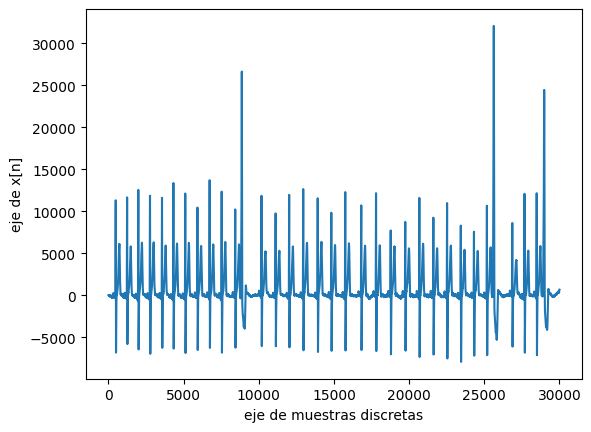

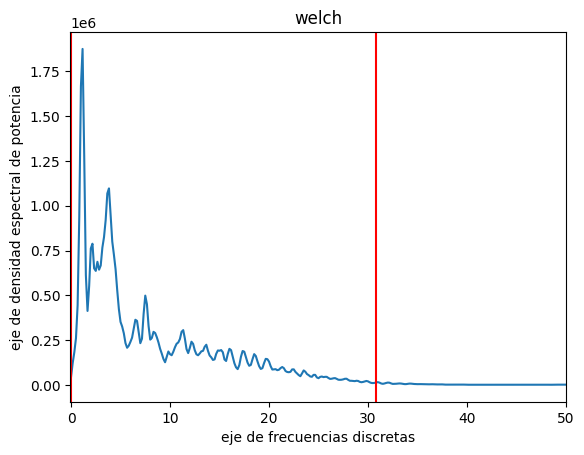

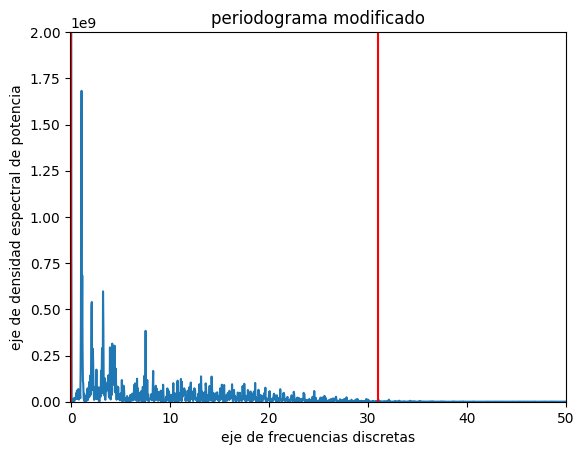

     ancho de banda    |  inferior      |    superior
periodograma modificado| 0.0 | 30.966666666666665  |
welch                  | 0.0 | 30.833333333333332  |


In [11]:
ecg_one_lead = np.load('ecg_sin_ruido.npy')
fs_ecg = 1000 # Hz

plt.figure(1)
plt.plot(ecg_one_lead)
plt.xlabel("eje de muestras discretas")
plt.ylabel("eje de x[n]")


#--------------------------welch----------------------------
promedios=10#10
zero_padding=2
nperseg=ecg_one_lead.shape[0]//promedios

f_welch , dsp_welch=sig.welch(x=ecg_one_lead, fs=fs_ecg ,window="hamming",nperseg = nperseg, nfft=zero_padding*nperseg)

area=np.cumsum(dsp_welch)

bb_max=np.where((area/np.max(area))>0.99)
bw_max_welch=f_welch[bb_max[0][0]]

bb_min=np.where(dsp_welch>dsp_welch[bb_max[0][0]])
bw_min_welch=f_welch[bb_min[0][0]]

plt.figure(2)
plt.plot(f_welch,dsp_welch)
plt.xlabel("eje de frecuencias discretas")
plt.ylabel("eje de densidad espectral de potencia")
plt.title("welch")
plt.axvline(x=bw_max_welch,color='r')
plt.axvline(x=bw_min_welch,color="r")
plt.xlim(-0.1,50)
#----------------------periodograma modificado-------------
hamming = sig.windows.hamming(len(ecg_one_lead))

x_n=hamming*ecg_one_lead
dsp_perio=np.fft.fft(x_n)
dsp_perio=(np.abs(dsp_perio)**2)/len(ecg_one_lead)
dsp_perio=dsp_perio[0:int(len(dsp_perio)/2)]
f_perio=(fs_ecg/len(ecg_one_lead))*np.arange(len(dsp_perio))

area=np.cumsum(dsp_perio)

bb_max=np.where((area/np.max(area))>0.99)
bw_max_perio=f_perio[bb_max[0][0]]

bb_min=np.where(dsp_perio>dsp_perio[bb_max[0][0]])
bw_min_perio=f_perio[bb_min[0][0]]


plt.figure(3)
plt.plot(f_perio,dsp_perio)
plt.xlabel("eje de frecuencias discretas")
plt.ylabel("eje de densidad espectral de potencia")
plt.title("periodograma modificado")
plt.axvline(x=bw_max_perio,color='r')
plt.axvline(x=bw_min_perio,color="r")
plt.xlim(-0.1,50)
plt.ylim(0,2*10**9)

plt.show()
#por que en perio aparece frecuencias al final? por nyquist creo pq aparence espejadas
#--------------------------------------tabla de anchos de banda-------------------------------
print("     ancho de banda    |  inferior      |    superior")
print("periodograma modificado|",bw_min_perio,"|",bw_max_perio," |",)
print("welch                  |",bw_min_welch,"|",bw_max_welch," |",)



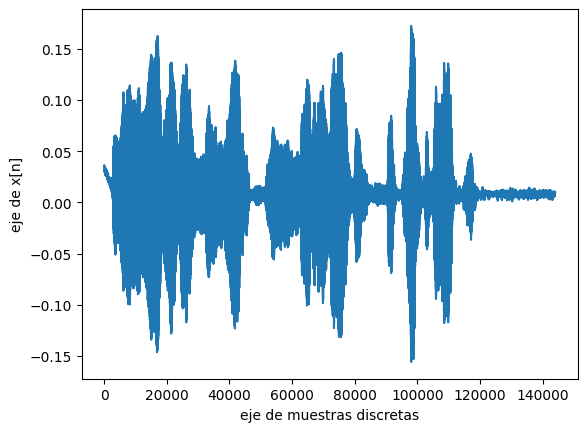

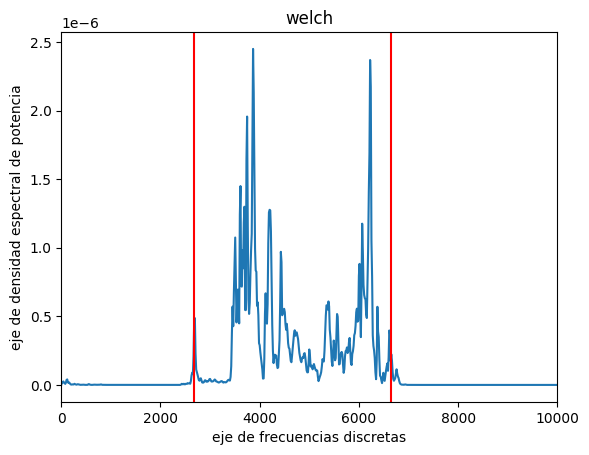

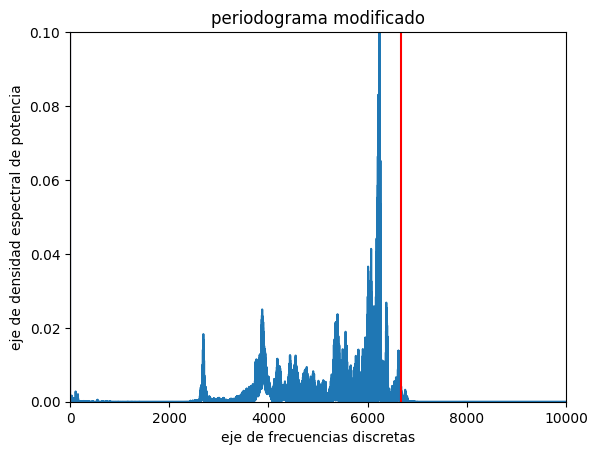

     ancho de banda    |  inferior      |    superior
periodograma modificado| 0.0 | 6667.333333333333  |
welch                  | 2680.0 | 6653.333333333334  |


In [12]:

fs_audio, wav_data = sio.wavfile.read('silbido.wav')

plt.figure(1)
plt.plot(wav_data)
plt.xlabel("eje de muestras discretas")
plt.ylabel("eje de x[n]")
#---------------------------welch------------------------------------
promedios=40 #50
zero_padding=1
nperseg=wav_data.shape[0]//promedios

f_welch_ha , psd_welch_ha=sig.welch(x=wav_data, fs=fs_audio ,window="hamming",nperseg = nperseg, nfft=zero_padding*nperseg)

area=np.cumsum(psd_welch_ha)
bb_max=np.where((area/np.max(area))>0.99)
bw_max_welch=f_welch_ha[bb_max[0][0]]
bb_min=np.where(psd_welch_ha>psd_welch_ha[bb_max[0][0]])
bw_min_welch=f_welch_ha[bb_min[0][0]]

plt.figure(2)
plt.plot(f_welch_ha,psd_welch_ha)
plt.xlabel("eje de frecuencias discretas")
plt.ylabel("eje de densidad espectral de potencia")
plt.title("welch")
plt.axvline(x=bw_max_welch,color='r')
plt.axvline(x=bw_min_welch,color="r")
plt.xlim(0,10000)

#----------------------periodograma modificado-------------
#aclaracion: por se que lo tranformamos medio a mano las frecuencias se repite en nyquist por lo tanto 
#hay que cortar a la mitad la dessidad espectral de potencia
hamming = sig.windows.hamming(len(wav_data))

x_n=hamming*wav_data
dsp_perio=np.fft.fft(x_n)
dsp_perio=(np.abs(dsp_perio)**2)/len(wav_data)
dsp_perio=dsp_perio[0:72000]#lo hice a mano pq hacer len(wav_data) te lo convierte en flotante y eso no le gusta en vectores 
f_perio=(fs_audio/len(wav_data))*np.arange(len(dsp_perio))

area=np.cumsum(dsp_perio)

bb_max=np.where((area/np.max(area))>0.99)
bw_max_perio=f_perio[bb_max[0][0]]
bb_min=np.where(dsp_perio>dsp_perio[bb_max[0][0]])
bw_min_perio=f_perio[bb_min[0][0]]


plt.figure(3)
plt.plot(f_perio,dsp_perio)
plt.xlabel("eje de frecuencias discretas")
plt.ylabel("eje de densidad espectral de potencia")
plt.title("periodograma modificado")
plt.axvline(x=bw_max_perio,color='r')
plt.axvline(x=bw_min_perio,color="r")
plt.xlim(-0.1,10000)
plt.ylim(0,1*10**-1)
plt.show()
#por que la potencia no da igual?
#--------------------------------------tabla de anchos de banda-------------------------------
print("     ancho de banda    |  inferior      |    superior")
print("periodograma modificado|",bw_min_perio,"|",bw_max_perio," |",)
print("welch                  |",bw_min_welch,"|",bw_max_welch," |",)


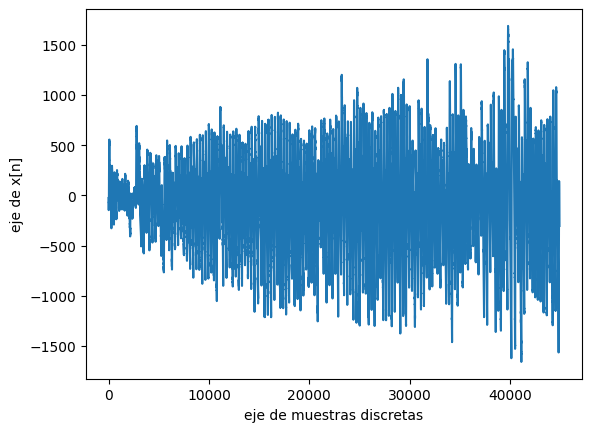

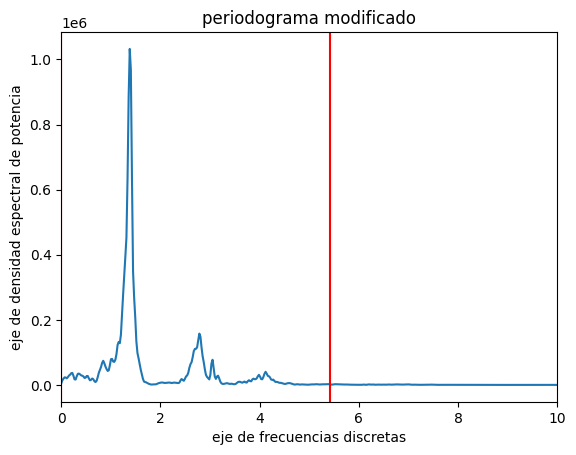

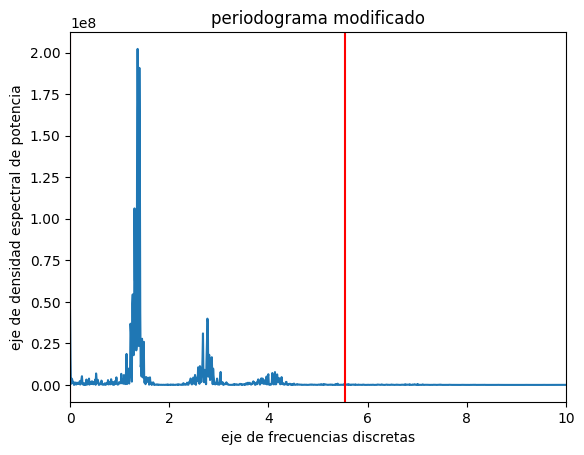

     ancho de banda    |  inferior      |    superior
periodograma modificado| 0.0 | 5.5388588347915135  |
welch                  | 0.0 | 5.410219303128131  |


In [13]:

fs_ppg = 400 # Hz

ppg = np.load('ppg_sin_ruido.npy')

plt.figure(1)
plt.plot(ppg)

plt.xlabel("eje de muestras discretas")
plt.ylabel("eje de x[n]")
#--------------------------------------welch-----------------------------------
promedios=5#5
zero_padding=2
nperseg=ppg.shape[0]//promedios
f_welch_ppg , psd_welch_ppg = sig.welch(x=ppg, fs=fs_ppg ,window="hamming",nperseg = nperseg, nfft=zero_padding*nperseg)

area=np.cumsum(psd_welch_ppg)
bb_max=np.where((area/np.max(area))>0.99)
bw_max_welch=f_welch_ppg [bb_max[0][0]]
bb_min=np.where(psd_welch_ppg>psd_welch_ppg[bb_max[0][0]])
bw_min_welch=f_welch_ppg[bb_min[0][0]]


plt.figure(2)
plt.plot(f_welch_ppg,psd_welch_ppg)
plt.xlabel("eje de frecuencias discretas")
plt.ylabel("eje de densidad espectral de potencia")
plt.title("periodograma modificado")
plt.axvline(x=bw_max_welch,color='r')
plt.axvline(x=bw_min_welch,color="r")
plt.xlim(0,10)

#----------------------periodograma modificado-------------
#aclaracion: por se que lo tranformamos medio a mano las frecuencias se repite en nyquist por lo tanto 
#hay que cortar a la mitad la dessidad espectral de potencia
hamming = sig.windows.hamming(len(ppg))

x_n=hamming*ppg
dsp_perio=np.fft.fft(x_n)
dsp_perio=(np.abs(dsp_perio)**2)/len(ppg)
dsp_perio=dsp_perio[0:int(len(dsp_perio)/2)]#lo hice a mano pq hacer len(wav_data) te lo convierte en flotante y eso no le gusta en vectores 
f_perio=(fs_ppg/len(ppg))*np.arange(len(dsp_perio))

area=np.cumsum(dsp_perio)

bb_max=np.where((area/np.max(area))>0.99)
bw_max_perio=f_perio[bb_max[0][0]]
bb_min=np.where(dsp_perio>dsp_perio[bb_max[0][0]])
bw_min_perio=f_perio[bb_min[0][0]]


plt.figure(3)
plt.plot(f_perio,dsp_perio)
plt.xlabel("eje de frecuencias discretas")
plt.ylabel("eje de densidad espectral de potencia")
plt.title("periodograma modificado")
plt.axvline(x=bw_max_perio,color='r')
plt.axvline(x=bw_min_perio,color="r")

plt.xlim(0,10)

plt.show()
#--------------------------------------tabla de anchos de banda-------------------------------
print("     ancho de banda    |  inferior      |    superior")
print("periodograma modificado|",bw_min_perio,"|",bw_max_perio," |",)
print("welch                  |",bw_min_welch,"|",bw_max_welch," |",)
